In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
data=pd.read_csv('HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Observation:
    1. Its a classification problem.
    2. we need to develop a model than can predict the attrition of the employee baased on given independent feature

In [12]:
data.shape

(1470, 35)

There are 35 features and 1470 rows in the given data

In [13]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [15]:
data['EnvironmentSatisfaction'].dtype

dtype('int64')

In [16]:
descrete_features=[]
categorical_features=[]

for i in data.columns:
    if data[i].dtype == 'object':
        categorical_features.append(i)
    else:
        descrete_features.append(i)
print('Total No of descrete features is : ',len(descrete_features))
print('Total No of categorical features is : ',len(categorical_features))        

Total No of descrete features is :  26
Total No of categorical features is :  9


In [17]:
descrete_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

There are 9 categorical features for which we will encode using encoding techniques in feature engineering        
there are 26 categorical features for which we would need to check theskewness and outliers and fix them up if any         
we will also try to reecude the number of feaature by find the most impotant feature usinf extra tree regressor       

In [18]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the given data set

In [19]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations:
    1. Age is normally distributedand there is no outliers                                           
    2. Daily rate falls etween 102 to 1499. kde curve is not assymetrical and there are no outliers                             
    3. Distance from home skewed and the distribution is high                          
    4. Education category as 3 employees is high in the given dataset and 5 as low                                   
    5. Employee counts is  for all data in the given data set, which wil not make any impact in the target variable        
    6. Employee number is unique for each employees                                 
    7. EnvironmentSatisfaction category as 3 and 4 are high in the given dtaset                       
    8. Minimum hourly rate is 20.39 and teh maximum is 100                              
    9. Maximum data falls under Job involvement category 3 and there are no outliers                               
    10.Maximum employees falls under job level 1 & 2, 3,4 and 5 are subsequently low and job level is skewed                   
    11. maximum exployees are faals under role Sales executive and reach scientist                           
    12. Job satisfication are at four levels in the gien data set, 1 ad 2 is lesser that 3 and 4 levels                    
    13. MonthlyIncome feature is skewed and there aree outliers in the give data set                             
    14. Monthly rate is not symmetrical, but not skewed. there are no outliers                               
    15. no.of companies worked as 1 is high in the given data set and there are outliers and data is skewed                         16. minimum hike percentage is 11 and the maximum is 25
    17. years is current role is skewed as the 50% is 3 where the max is 18                                                     
    18. years since last promotion is skewed and tehre are outliers                              
    19. years since last promotion is skewed and tehre are outliers 

# Univariate Analysis

<AxesSubplot:>

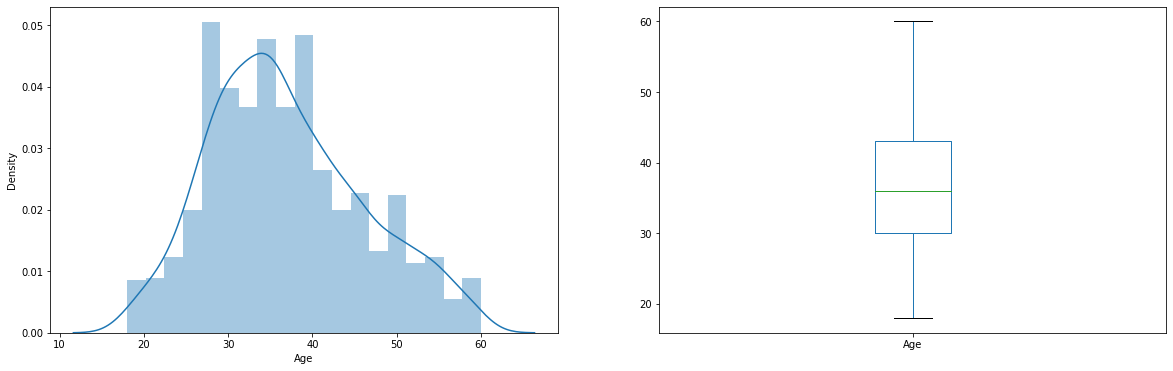

In [20]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['Age'])
plt.subplot(1,2,2)
data.Age.plot.box()

Age feature is skewed to teh right and theree re no outliers, minimum age of an employee is 18 and the maximum is 60

<AxesSubplot:xlabel='Attrition', ylabel='count'>

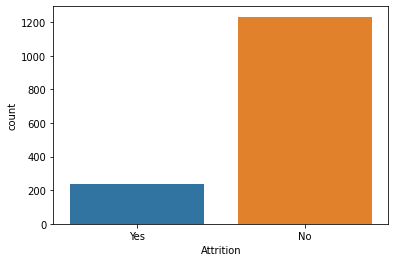

In [21]:
sns.countplot(data['Attrition'])

nearly 250 employees are having attritation(Target Varible) as Yes and the rest are no, hence its a classification problem. given dataset is an imbalced data set, we will balce them using extra tree regressor in the featre engineering section

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

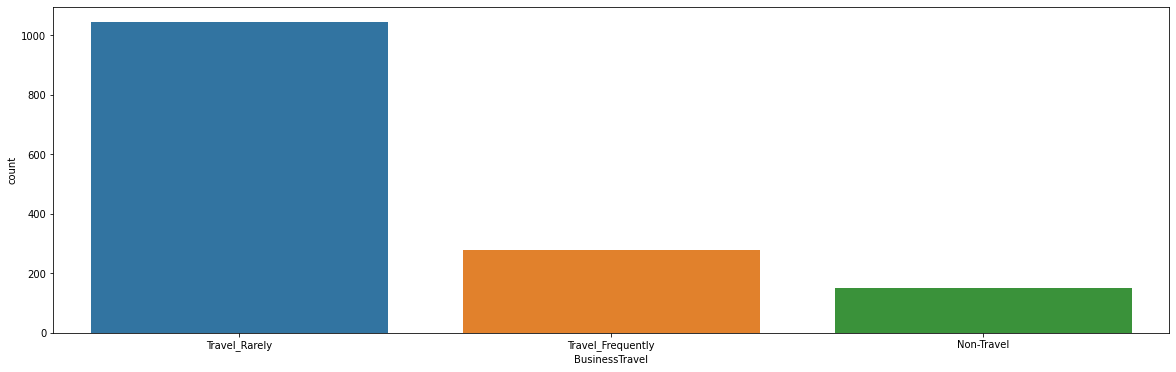

In [22]:
plt.figure(figsize=(20,6))
sns.countplot(data['BusinessTravel'])

nearly 1000 employees travel rearely, nearly 300 employees trvels frequently and there nerly 100 employees who donot travel

<AxesSubplot:>

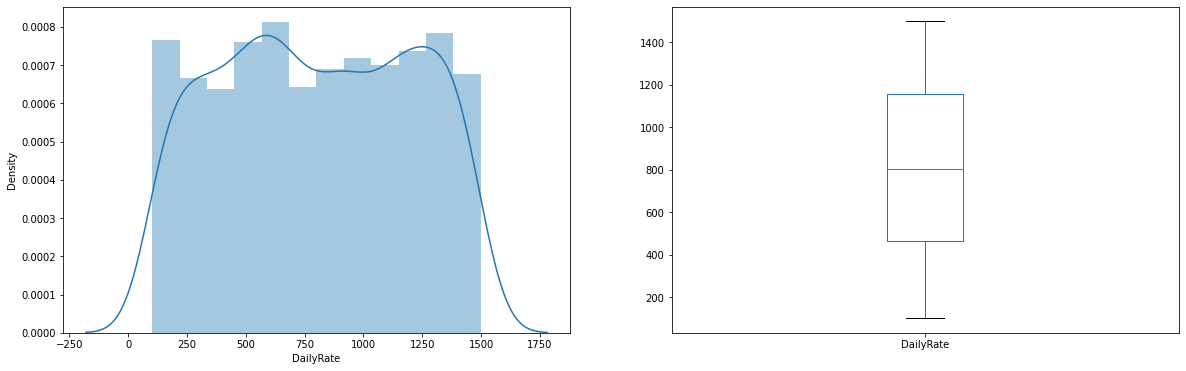

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['DailyRate'])
plt.subplot(1,2,2)
data.DailyRate.plot.box()

dailyrate is not skewed but not symmetrical and there is outliers

<AxesSubplot:xlabel='Department', ylabel='count'>

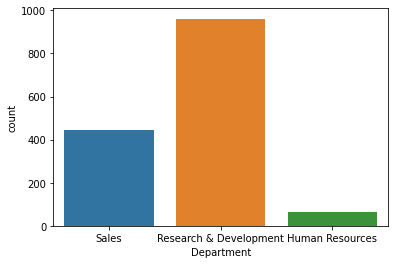

In [24]:
sns.countplot(data['Department'])

there are employees from three deprtments in the given dataset, nearly 400 employees are from Sales, nearly 900 employees are from Research and development and 50 sployees are from HR

<AxesSubplot:>

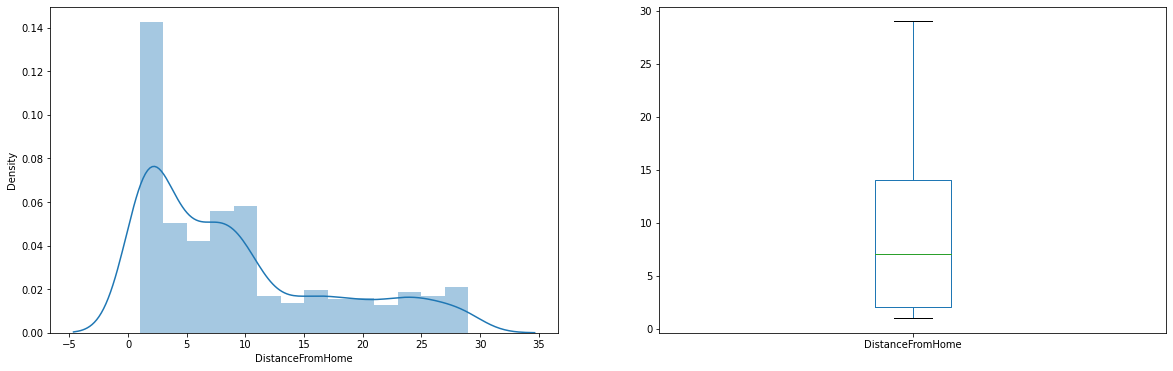

In [25]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['DistanceFromHome'])
plt.subplot(1,2,2)
data.DistanceFromHome.plot.box()

DistanceFromHome is skewed to the right and there are no outliers

<AxesSubplot:xlabel='Education', ylabel='count'>

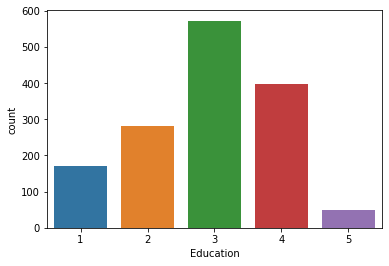

In [26]:
sns.countplot(data['Education'])

higest number of employees fall under education category 3 and the least is category 5.

<AxesSubplot:xlabel='EducationField', ylabel='count'>

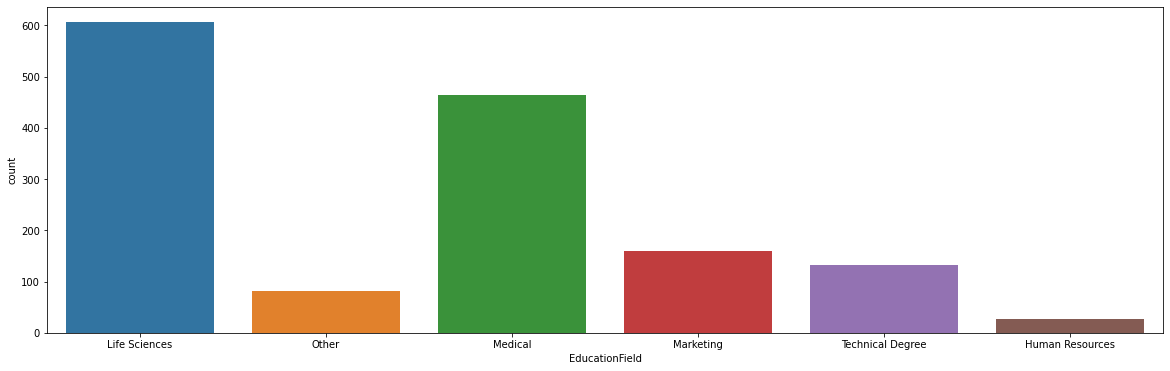

In [27]:
plt.figure(figsize=(20,6))
sns.countplot(data['EducationField'])

majority of IBM employeesare from life science degrees, medical domain employees are also working with IBM as the second highest number of resources

<AxesSubplot:>

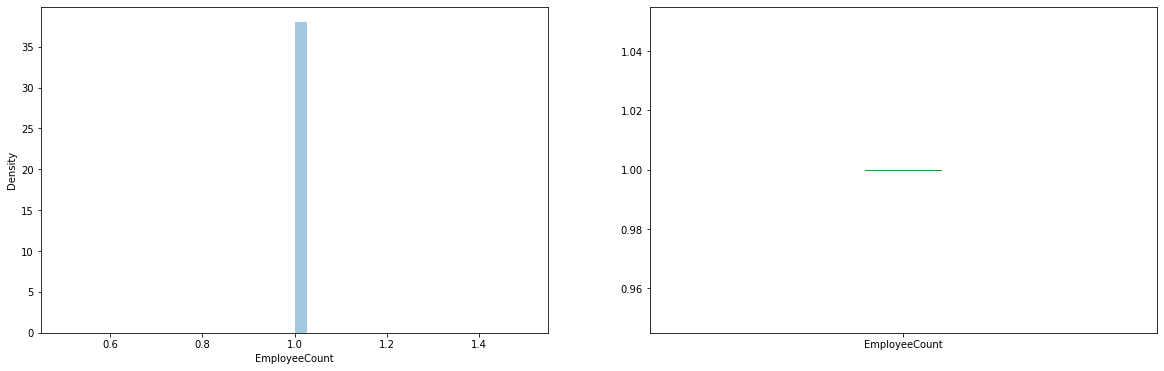

In [28]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['EmployeeCount'])
plt.subplot(1,2,2)
data.EmployeeCount.plot.box()

All the employees are from employee count as 1, this feature will not impact attrition prediction

<AxesSubplot:>

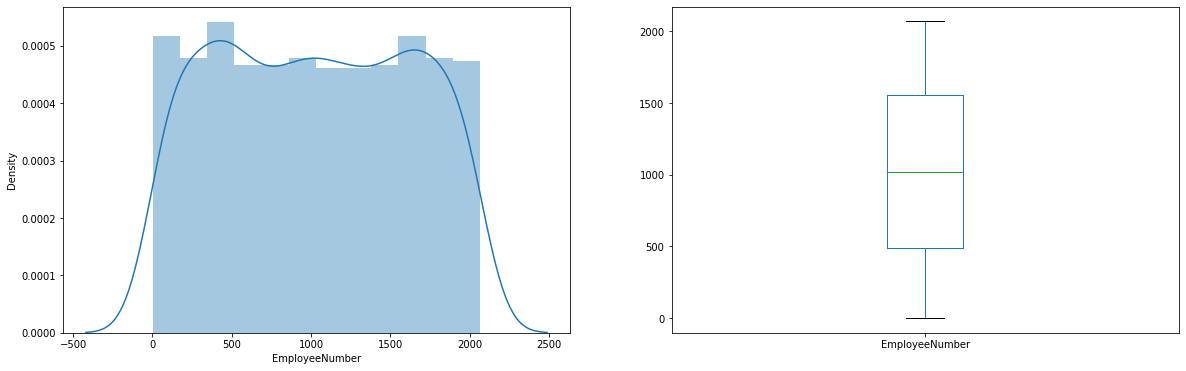

In [29]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['EmployeeNumber'])
plt.subplot(1,2,2)
data.EmployeeNumber.plot.box()

Employee number is unique for each employee there are no outliers. and data is not skewed, this should not impact the prediction

<AxesSubplot:>

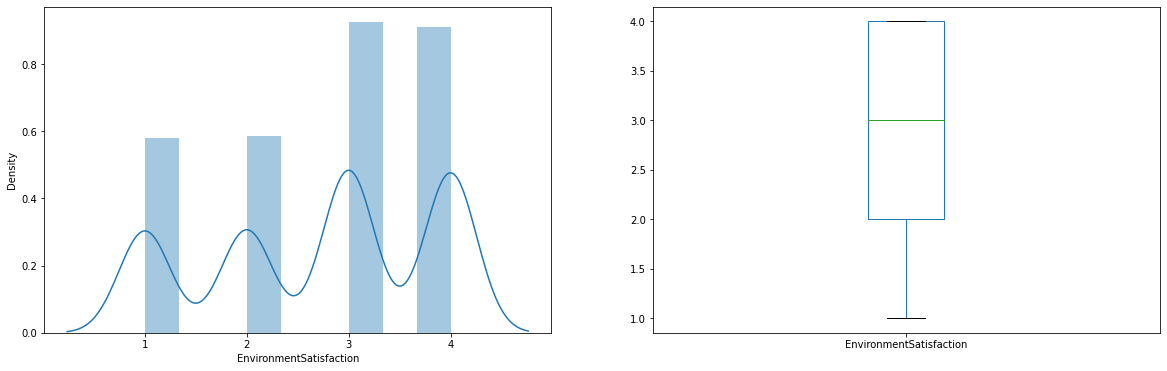

In [30]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['EnvironmentSatisfaction'])
plt.subplot(1,2,2)
data.EnvironmentSatisfaction.plot.box()

There are no outliers in environment satisfaction feature, data is not skewed but not symmetrical

<AxesSubplot:xlabel='Gender', ylabel='count'>

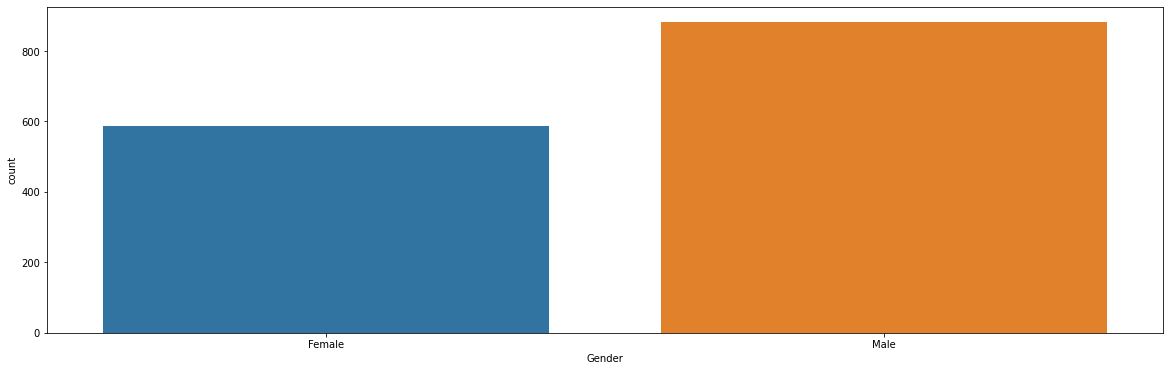

In [31]:
plt.figure(figsize=(20,6))
sns.countplot(data['Gender'])

nearly 900 resources are male and 600 resources are female

<AxesSubplot:>

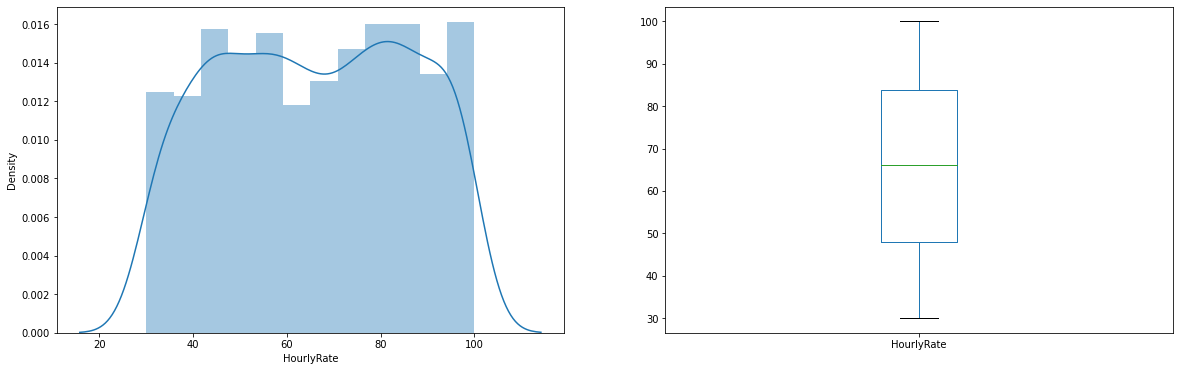

In [32]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['HourlyRate'])
plt.subplot(1,2,2)
data.HourlyRate.plot.box()

Hourly featuree is not skewed and there are no outliers but it is assymetrical

<AxesSubplot:>

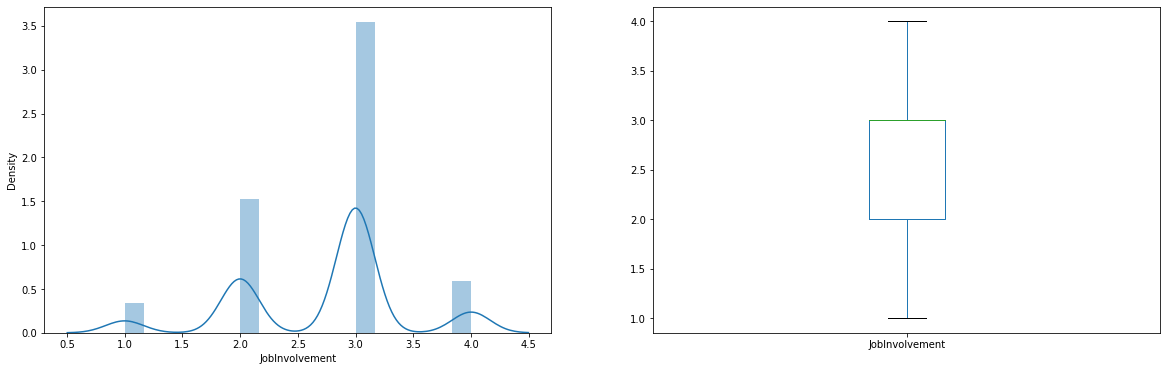

In [33]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['JobInvolvement'])
plt.subplot(1,2,2)
data.JobInvolvement.plot.box()

Job involement feature is not skewed and there are no outliers

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

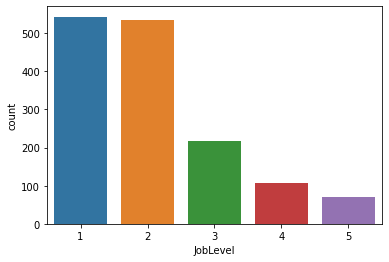

In [34]:
sns.countplot(data['JobLevel'])

maximum employees job level is 1 and 2

<AxesSubplot:xlabel='JobRole', ylabel='count'>

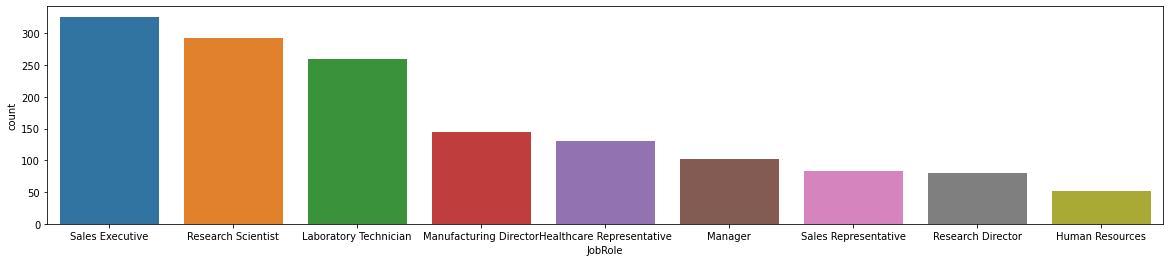

In [35]:
plt.figure(figsize=(20,4))
sns.countplot(data['JobRole'])

maximum employees are distributed to sales, research and Lab techs. There are 9  job roles avilable in the gven dataset

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

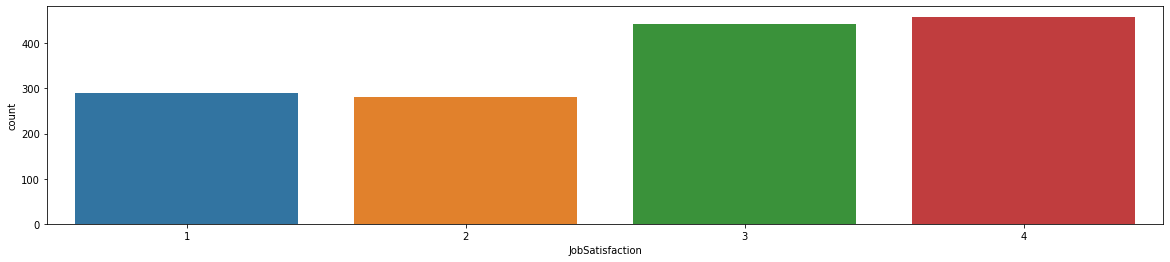

In [36]:
plt.figure(figsize=(20,4))
sns.countplot(data['JobSatisfaction'])

majority of the employees falls under job satisfaction category 3 and 4

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

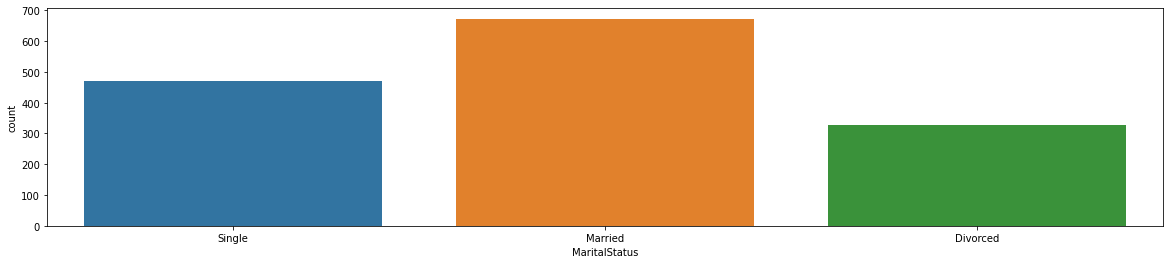

In [37]:
plt.figure(figsize=(20,4))
sns.countplot(data['MaritalStatus'])

Married employees are high in the given data set, singles are higher than divorced and married, divorced employees are the least in the given dtaset

<AxesSubplot:>

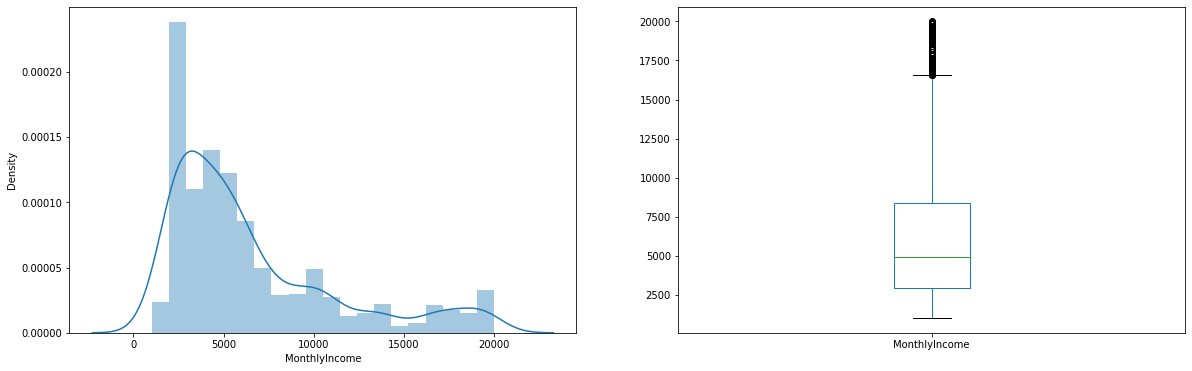

In [38]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(data['MonthlyIncome'])
plt.subplot(1,2,2)
data.MonthlyIncome.plot.box()

minimum monthly income paid to the employees is 1000 and the maximum is 20000 in the given dataset, data is skewed to the right and there re outliers

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

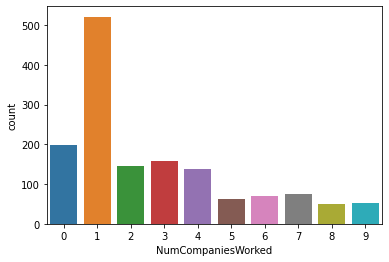

In [39]:
sns.countplot(data['NumCompaniesWorked'])

maximum number of companies worked of an employee is 9 as per the given dataset and the minimum is 1.

<AxesSubplot:>

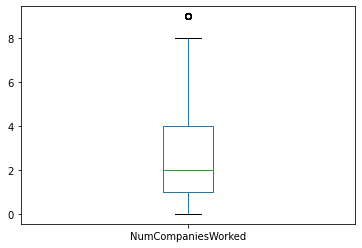

In [40]:
data.NumCompaniesWorked.plot.box()

There are outliers in the number of companies worked feature and the data is skewed to the right

<AxesSubplot:xlabel='Over18', ylabel='count'>

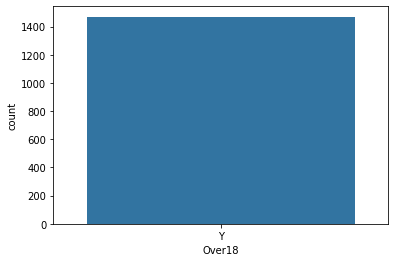

In [41]:
sns.countplot(data['Over18'])

All the employees in the given data set is over 18

<AxesSubplot:xlabel='OverTime', ylabel='count'>

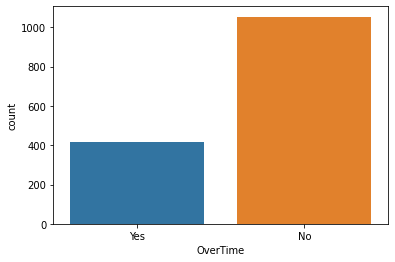

In [42]:
sns.countplot(data['OverTime'])

more than 1000 employees does over time and neaarly 400 employees do not work over time as pr the given data set

<AxesSubplot:>

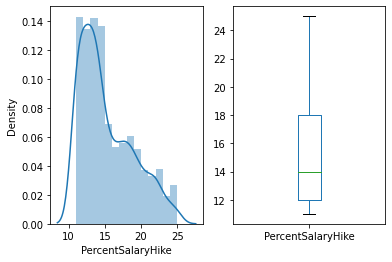

In [43]:
plt.subplot(1,2,1)
sns.distplot(data['PercentSalaryHike'])
plt.subplot(1,2,2)
data.PercentSalaryHike.plot.box()

minimum salary hike given to the employee is 11% and the mximum is 25% as per the given data set and there are no outliers.

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

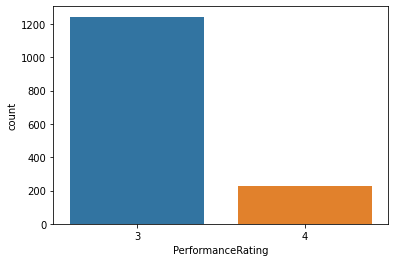

In [44]:
sns.countplot(data['PerformanceRating'])

There re two performance rating is given to the employees asa per the given data set, minmum is 3 nd the maximum is 4

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

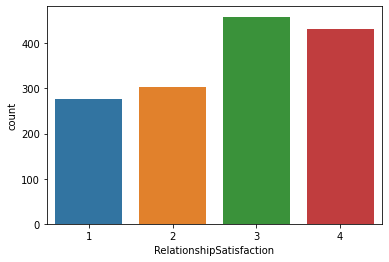

In [45]:
sns.countplot(data['RelationshipSatisfaction'])

theree are four categories in relationship satifcation, highest number of employees fall under category 3 and 4

<AxesSubplot:xlabel='StandardHours', ylabel='count'>

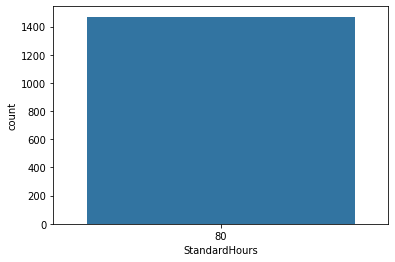

In [46]:
sns.countplot(data['StandardHours'])

all the employees are falling under same standard hours, this feature should not impact the prediction

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

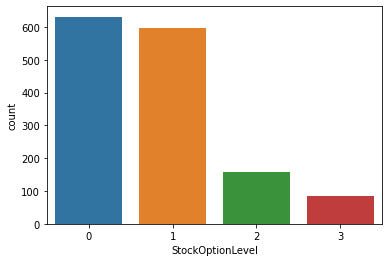

In [47]:
sns.countplot(data['StockOptionLevel'])

there are four categories of tock level options are give to its smployees. maximum employees falls under category 1&2

<AxesSubplot:>

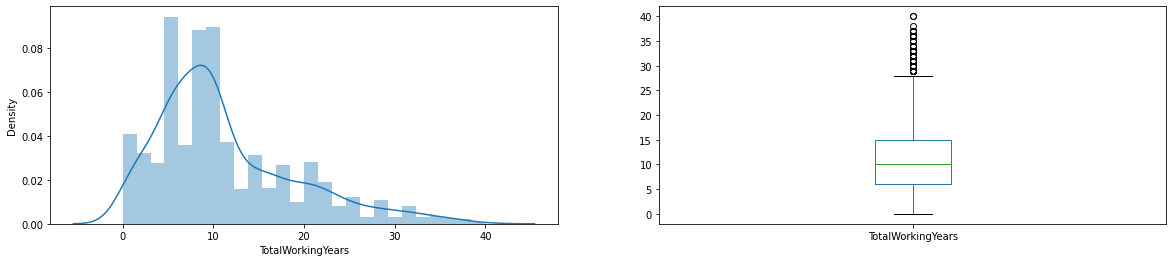

In [48]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.distplot(data['TotalWorkingYears'])
plt.subplot(1,2,2)
data.TotalWorkingYears.plot.box()

total working years are falling between range of 0 to 40. total yers of working feture skewwed to teh right and there are outliers

<AxesSubplot:>

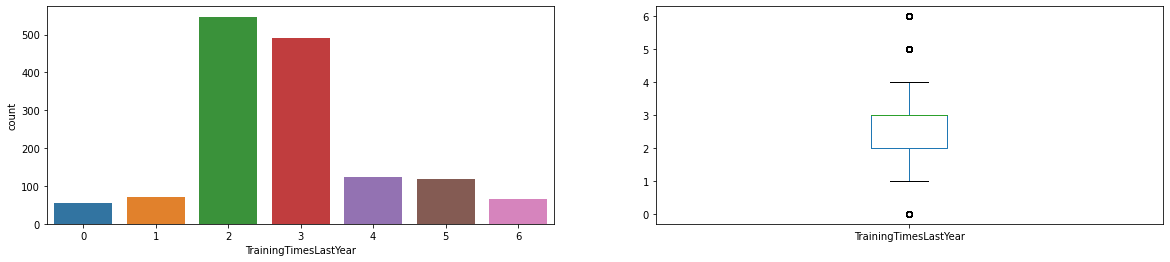

In [49]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.countplot(data['TrainingTimesLastYear'])
plt.subplot(1,2,2)
data.TrainingTimesLastYear.plot.box()

employees training time falls under range of 0 to 6, majority of the employees are trained twice in the last yeat, dta is skewed and there are outliers

<AxesSubplot:>

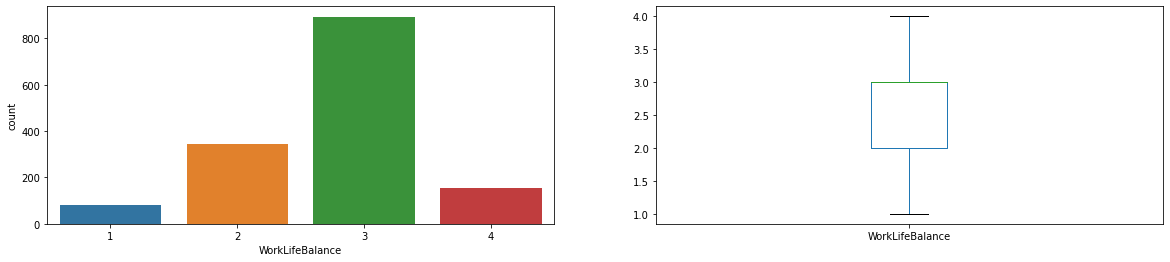

In [50]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.countplot(data['WorkLifeBalance'])
plt.subplot(1,2,2)
data.WorkLifeBalance.plot.box()

worklife balance is scaled in four categories from 1 to 4. work life balance is little skewed and there are no outliers.

<AxesSubplot:>

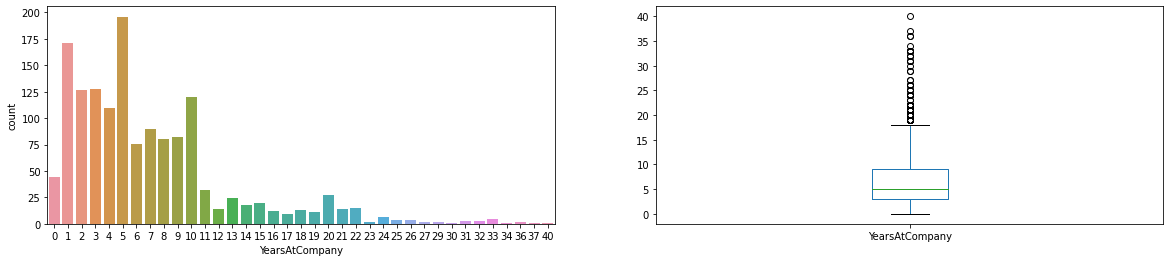

In [51]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.countplot(data['YearsAtCompany'])
plt.subplot(1,2,2)
data.YearsAtCompany.plot.box()

resources works in the sme company for minimum of 0 years and the maximum of 40 years as per the given data set.

<AxesSubplot:>

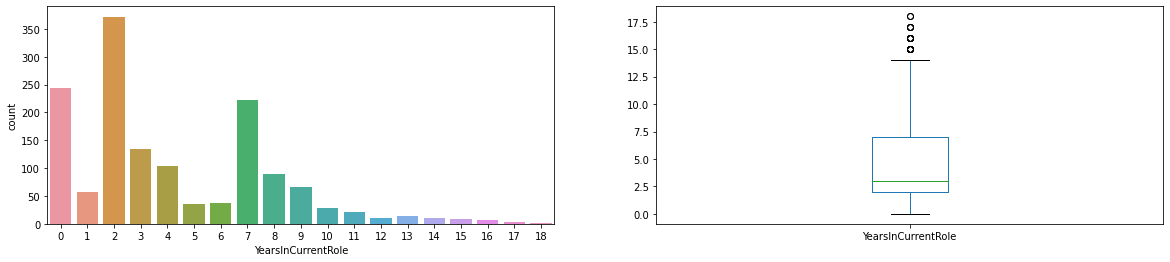

In [52]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.countplot(data['YearsInCurrentRole'])
plt.subplot(1,2,2)
data.YearsInCurrentRole.plot.box()

employees working at the same level for minimum of 0 and the maximum of 17 years

<AxesSubplot:>

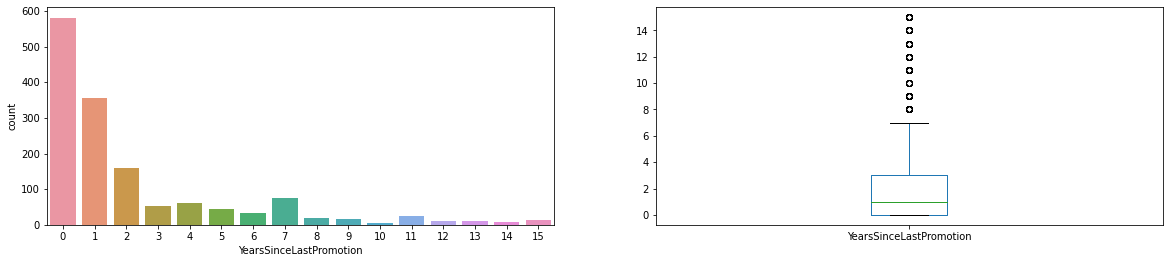

In [53]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.countplot(data['YearsSinceLastPromotion'])
plt.subplot(1,2,2)
data.YearsSinceLastPromotion.plot.box()

mximum employee git promotion last year, there are employee who got their promotion 15 years back, ther are outliers in the years since last promotion feature

<AxesSubplot:>

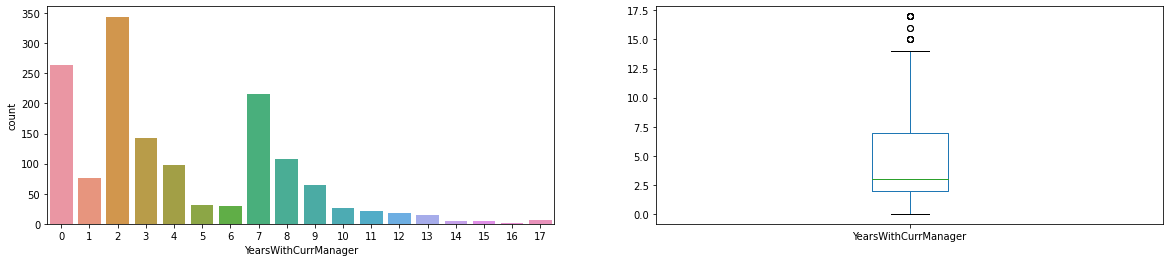

In [54]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.countplot(data['YearsWithCurrManager'])
plt.subplot(1,2,2)
data.YearsWithCurrManager.plot.box()

maximum of the employees working under the sme manager for last two years, secong highest is 0 yeras with teh same manager, there also nearly 225 employees works under the same manager for last 7 years. yeaars with current manager feature skewwed to the right an dthere are outliers

# BIVARIATE ANALYSIS

In [55]:
age_range=[]
for i in data['Age']:
    if i <20:
        age_range.append('Below 20')
    elif i <30:
        age_range.append('20-30')
    elif i <40:
        age_range.append('30-40')
    elif i <50:
        age_range.append('40-50')
    else:
        age_range.append('50-60')

len(age_range)

data['age_range']=age_range

<AxesSubplot:xlabel='age_range', ylabel='count'>

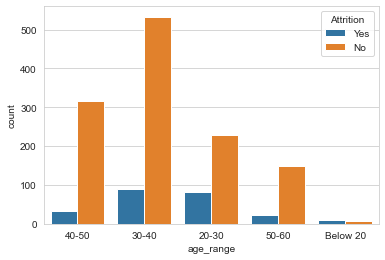

In [56]:
sns.set_style('whitegrid')
sns.countplot(x='age_range',hue='Attrition',data=data)

Attrition rate is low in the age group of 30-40, below 20 age group attritation rate is euql to retain rate.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

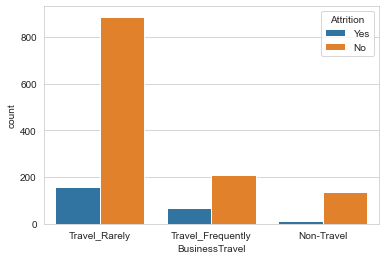

In [57]:
sns.set_style('whitegrid')
sns.countplot(x='BusinessTravel',hue='Attrition',data=data)

rarely travel group employees attrition rate is high compare two other two categories

<AxesSubplot:xlabel='DailyRate', ylabel='Attrition'>

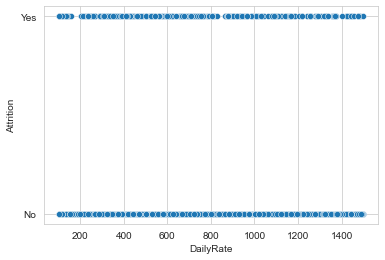

In [58]:
sns.set_style('whitegrid')
sns.scatterplot(x='DailyRate',y='Attrition',data=data)

Daily rate does not impact the target variable much

In [59]:
dailyrate_range=[]
for i in data['DailyRate']:
    if i <500:
        dailyrate_range.append('Below 500')
    elif i <1000:
        dailyrate_range.append('500-1000')
    else:
        dailyrate_range.append('1000-1500')

len(dailyrate_range)

data['dailyrate_range']=dailyrate_range

<AxesSubplot:xlabel='dailyrate_range', ylabel='count'>

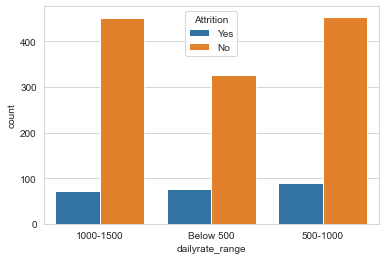

In [60]:
sns.set_style('whitegrid')
sns.countplot(x='dailyrate_range',hue='Attrition',data=data)

Attrition rate is high for employees whose dily rate is below 500

<AxesSubplot:xlabel='Department', ylabel='count'>

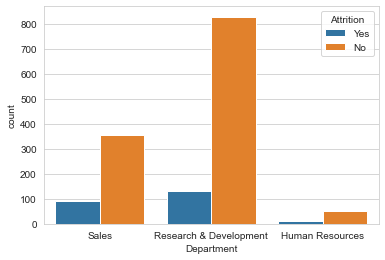

In [61]:
sns.set_style('whitegrid')
sns.countplot(x='Department',hue='Attrition',data=data)

department of research and development attrition rate is low compare to the other department, employees from sales department attrition rate is high

In [62]:
distance_range=[]
for i in data['DistanceFromHome']:
    if i <10:
        distance_range.append('<10')
    elif i <20:
        distance_range.append('>10<20')
    else:
        distance_range.append('>20')

len(distance_range)

data['distance_range']=distance_range

<AxesSubplot:xlabel='distance_range', ylabel='count'>

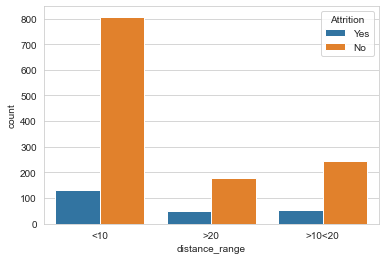

In [63]:
sns.set_style('whitegrid')
sns.countplot(x='distance_range',hue='Attrition',data=data)

nearly 900 employees are at the range of 10 from office, attrition rate of this group is low

<AxesSubplot:xlabel='Education', ylabel='count'>

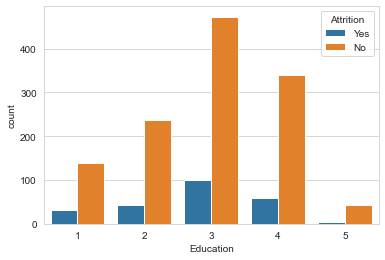

In [64]:
sns.set_style('whitegrid')
sns.countplot(x='Education',hue='Attrition',data=data)

Attrition rate is high in the department 4, nearly 350 employees are under department 4 where the attrion range is 60.

<AxesSubplot:xlabel='EducationField', ylabel='count'>

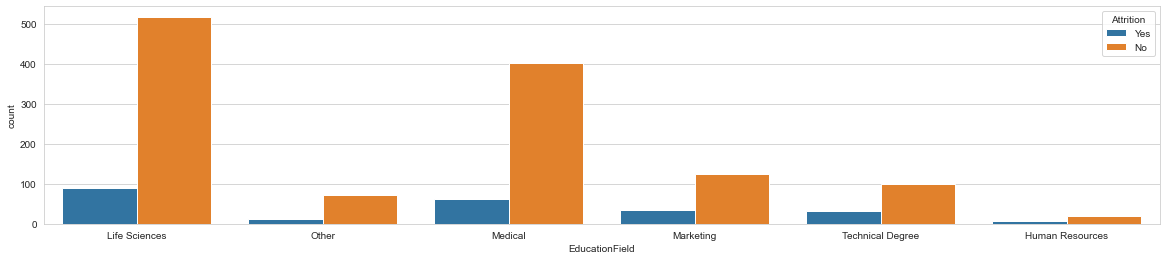

In [65]:
plt.figure(figsize=(20,4))
sns.set_style('whitegrid')
sns.countplot(x='EducationField',hue='Attrition',data=data)

attrition of highest number of employees is falling under Education field as Life science category

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

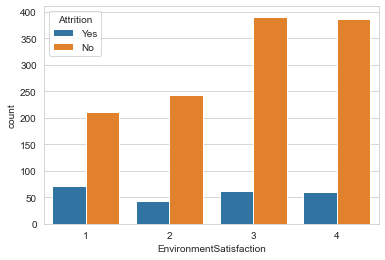

In [66]:
sns.set_style('whitegrid')
sns.countplot(x='EnvironmentSatisfaction',hue='Attrition',data=data)

high number of employees are getting attrition category yes when the environment satisfaction category as 1

<AxesSubplot:xlabel='Gender', ylabel='count'>

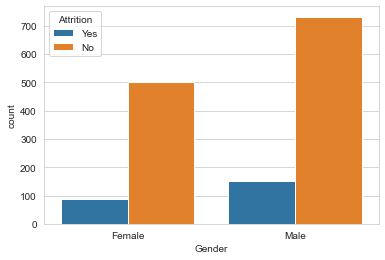

In [67]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',hue='Attrition',data=data)

male employees attrition is high comparitive to the Male employees

In [68]:
hourlyrate_range=[]
for i in data['HourlyRate']:
    if i <40:
        hourlyrate_range.append('<40')
    elif i <60:
        hourlyrate_range.append('<60')
    elif i <80:
        hourlyrate_range.append('<80')
    else:
        hourlyrate_range.append('<=100')

len(hourlyrate_range)

data['hourlyrate_range']=hourlyrate_range

<AxesSubplot:xlabel='hourlyrate_range', ylabel='count'>

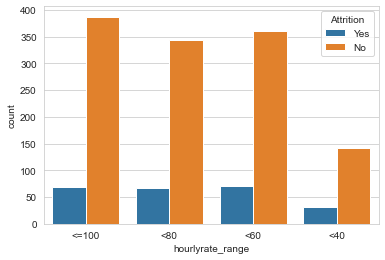

In [69]:
sns.set_style('whitegrid')
sns.countplot(x='hourlyrate_range',hue='Attrition',data=data)

most of the employees Hourly rate is more nthan 100. attrition is high on employee salary group more that 60.

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

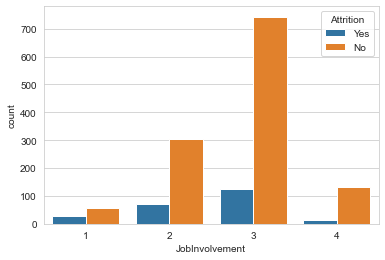

In [70]:
sns.set_style('whitegrid')
sns.countplot(x='JobInvolvement',hue='Attrition',data=data)

Highest range of attrition is happening on employees whose jobInvolement category 3.

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

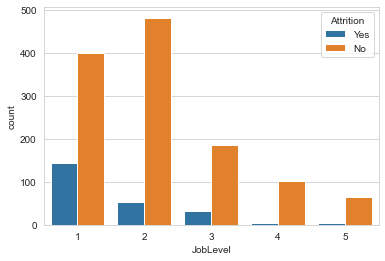

In [71]:
sns.set_style('whitegrid')
sns.countplot(x='JobLevel',hue='Attrition',data=data)

attrition is high on the employee group whose Joblevel is 1.

<AxesSubplot:xlabel='JobRole', ylabel='count'>

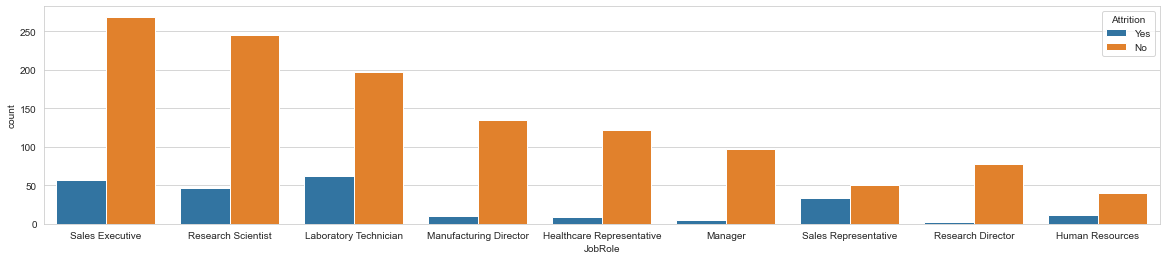

In [72]:
plt.figure(figsize=(20,4))
sns.set_style('whitegrid')
sns.countplot(x='JobRole',hue='Attrition',data=data)

sales executive and Lab technicians are high falls under attrition as yes category

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

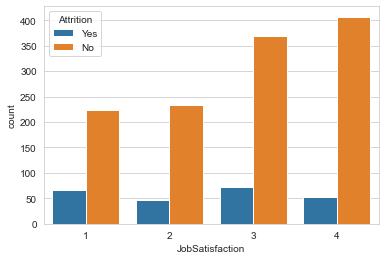

In [73]:
sns.set_style('whitegrid')
sns.countplot(x='JobSatisfaction',hue='Attrition',data=data)

attrition is happening on almost all group of JobSatifction level employees, but the attrition rate is high on level 4 employees.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

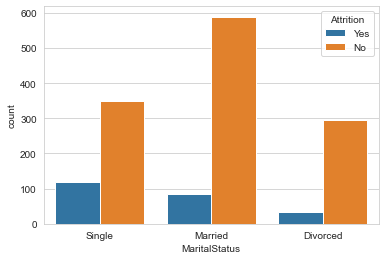

In [74]:
sns.set_style('whitegrid')
sns.countplot(x='MaritalStatus',hue='Attrition',data=data)

attrition is happening highly on employee who are single, divorced employees attrition raate is comparitively low

In [75]:
data.MonthlyIncome.max()

19999

In [76]:
MonthlyIncome_range=[]
for i in data['MonthlyIncome']:
    if i <5000:
        MonthlyIncome_range.append('<5000')
    elif i <10000:
        MonthlyIncome_range.append('<10000')
    elif i <15000:
        MonthlyIncome_range.append('<15000')
    else:
        MonthlyIncome_range.append('<=20000')

len(MonthlyIncome_range)

data['MonthlyIncome_range']=MonthlyIncome_range

<AxesSubplot:xlabel='MonthlyIncome_range', ylabel='count'>

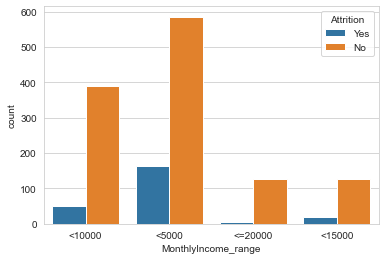

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='MonthlyIncome_range',hue='Attrition',data=data)

Highest number of employees are falling in range between 1000 to 5000, attrition is also high the same group

<AxesSubplot:xlabel='MonthlyRate', ylabel='MonthlyIncome'>

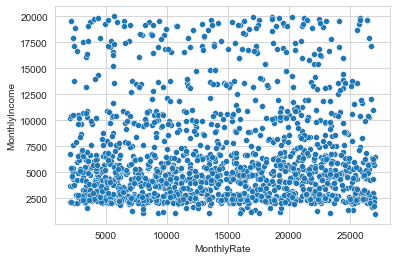

In [78]:
sns.scatterplot(x='MonthlyRate',y='MonthlyIncome',data=data)

most of the employees falls in the range of 7500 as monthly income and 25000 and monthly rate till 25000

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

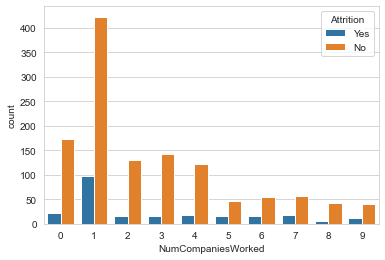

In [79]:
sns.set_style('whitegrid')
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=data)

High attrition is happening on group of emplyees who had worked in 1 compny prviously

<AxesSubplot:xlabel='OverTime', ylabel='count'>

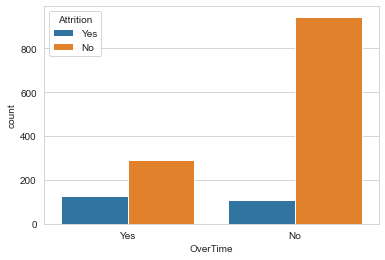

In [80]:
sns.set_style('whitegrid')
sns.countplot(x='OverTime',hue='Attrition',data=data)

little high attrition is happening on group whose overtime as yes

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

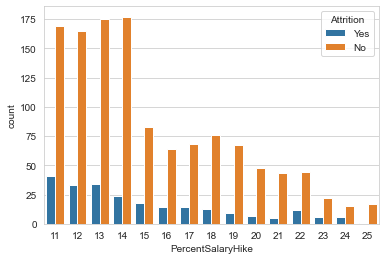

In [81]:
sns.set_style('whitegrid')
sns.countplot(x='PercentSalaryHike',hue='Attrition',data=data)

Highest attrition is happening for the resources who got hike percentage of 11 to 13

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

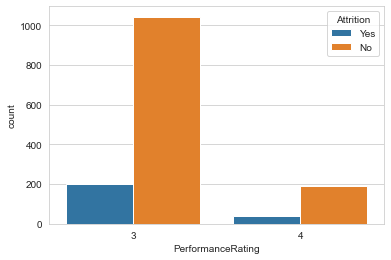

In [82]:
sns.set_style('whitegrid')
sns.countplot(x='PerformanceRating',hue='Attrition',data=data)

employees whose rating is 3 leads to high chnace of attrition

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

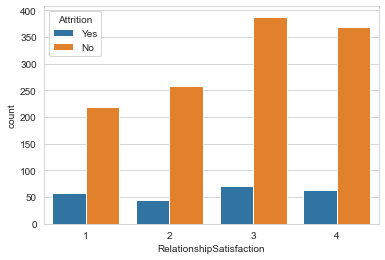

In [83]:
sns.set_style('whitegrid')
sns.countplot(x='RelationshipSatisfaction',hue='Attrition',data=data)

attrition is happening in all the group of relationship satisfaction more or less equally

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

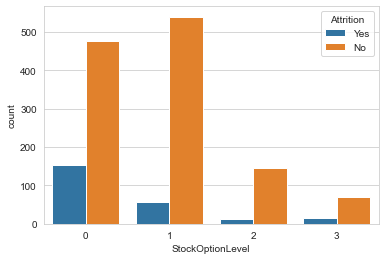

In [84]:
sns.set_style('whitegrid')
sns.countplot(x='StockOptionLevel',hue='Attrition',data=data)

high attrition is happening on employee group whose stockoption level is 0

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

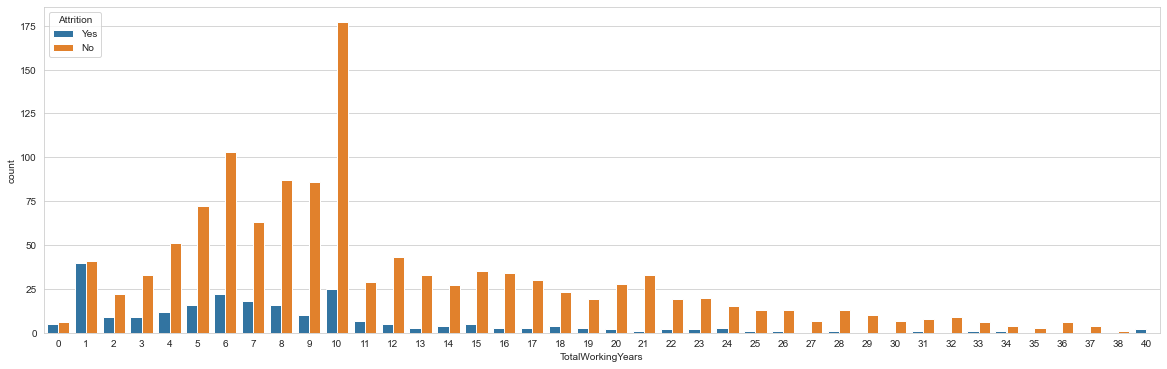

In [85]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='TotalWorkingYears',hue='Attrition',data=data)

as per the given data employees whose experice is 40 are reported as yes for attrition, employees whose experience is 0 and 1 nearly 50% of teh employees attrition reported as Yes

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

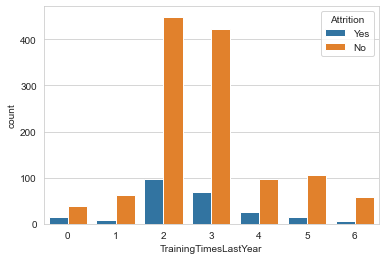

In [86]:
sns.set_style('whitegrid')
sns.countplot(x='TrainingTimesLastYear',hue='Attrition',data=data)

employees who got 6 times trained in last year reported for attrition is very low. two times trained employees are hiighly reported for attrition as yes

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

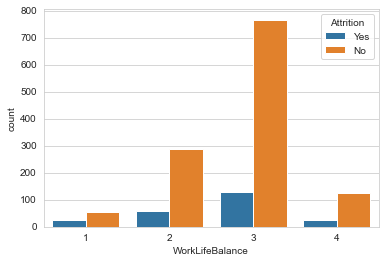

In [87]:
sns.set_style('whitegrid')
sns.countplot(x='WorkLifeBalance',hue='Attrition',data=data)

high attrition is happening on employees whose work life balance is 3

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

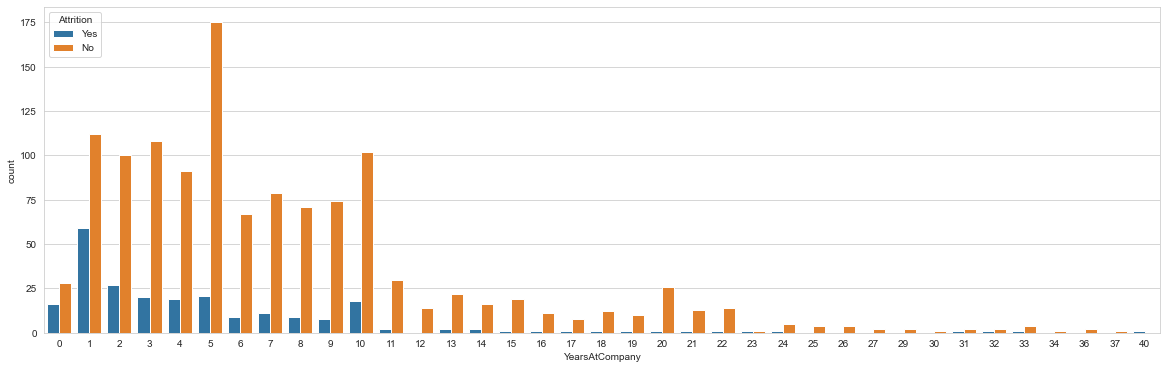

In [88]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='YearsAtCompany',hue='Attrition',data=data)

1 yer experience at company group employees are highly reported for attrition as Yes. Employees who worked in he same company for more that 11 years are reportedvery less for attrition

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

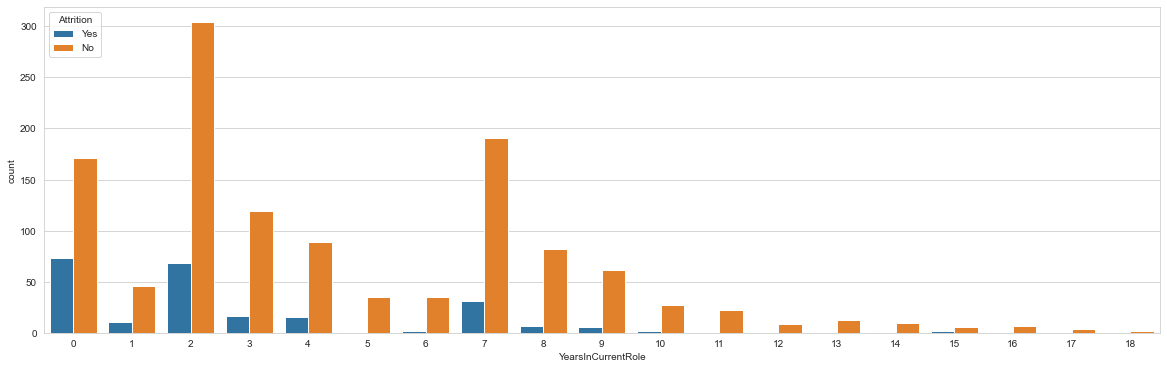

In [89]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='YearsInCurrentRole',hue='Attrition',data=data)

employees who has less than 0 years or 2 years of experience in the current role are highly reported for attrition.

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

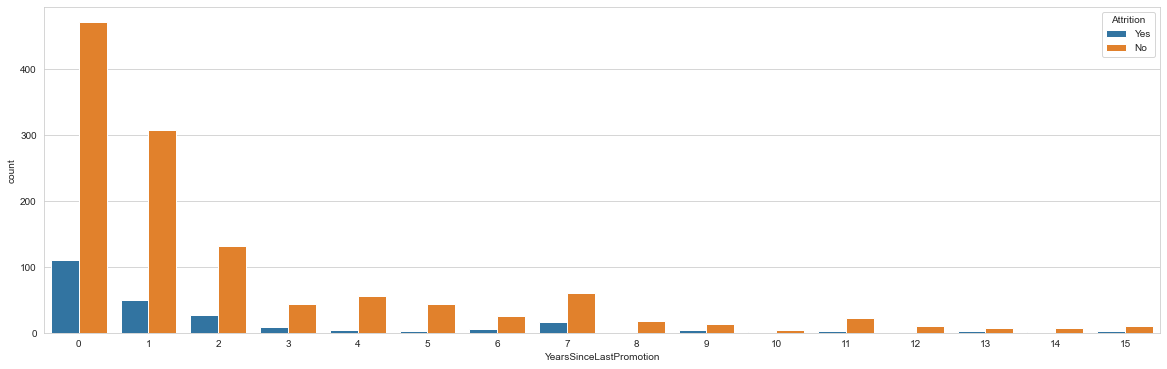

In [90]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=data)

reecently promoted employees are highly reported for attrition

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

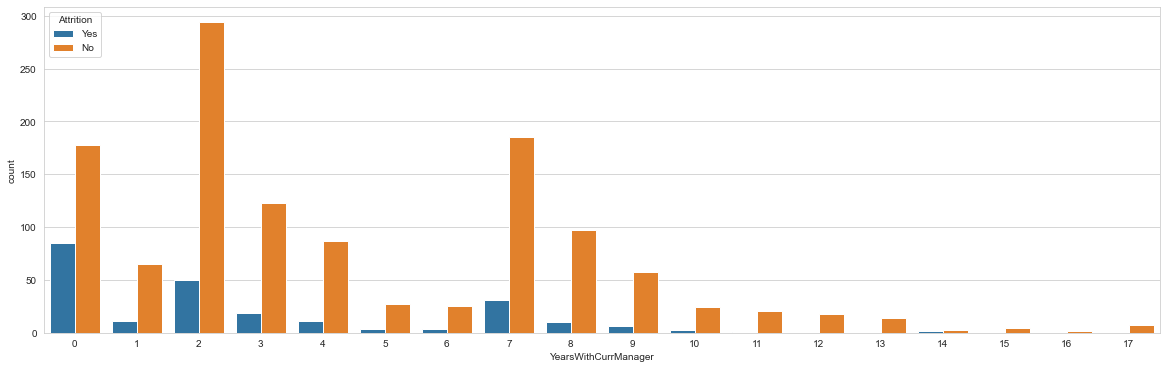

In [91]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=data)

Employees who has less than 0 years of experience with the current manager are highly reported for attrition.

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='PerformanceRating'>

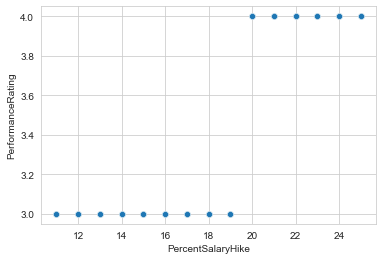

In [92]:
sns.scatterplot(x='PercentSalaryHike',y='PerformanceRating',data=data)

employees whose rating is less the hike percentage is less, whose rating is 3 , got maximum of 19 % hike.                 
Employees who got rating as 4 got the minimum hike of 20 and maximum of 25

<AxesSubplot:xlabel='Age', ylabel='YearsAtCompany'>

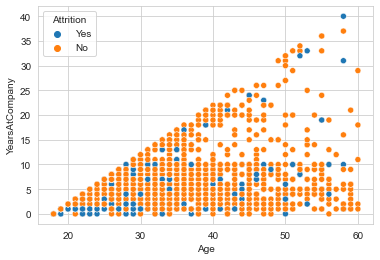

In [93]:
sns.scatterplot(x='Age',y='YearsAtCompany',hue='Attrition',data=data)

Age and yearsatcompany obviously has positive relationship

Lets drop the new columns created for univariate analysis

In [94]:
for i in data.columns:
    fea_intr=i.split('_')
    if fea_intr[:-1]:
        data.drop(i,axis=1,inplace=True)

In [95]:
print(data.columns)
print(len(data.columns))

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
35


# Multivariate Analysis

<AxesSubplot:>

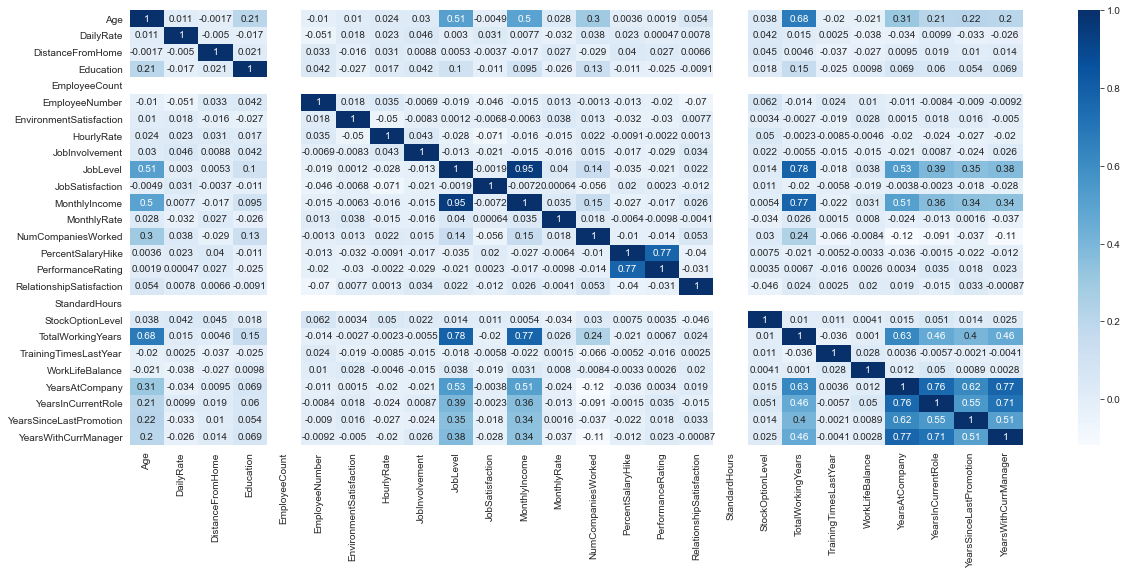

In [96]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

Observations:
    1. features Totl working years,Monthly income nd Jobe level correlates well with Age feature.
    2. Features Years at company, Total working years,Monthly income highly correlates with feaature Job Level
    3. Features Years at company and Total working year highly correlates with feaature Monthly income
    4. performance rating highly correlates with percentage of salary hike
    5. total working years correlates well with the feature years at company
    6. Years with current manage,years since last promotion,years current role and years at compny highly correlated with each other

# FEATURE ENGINEERING

Since there are no missing values, we are not performing any imputations

In [97]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# handling outliers

As we have seen in univariate analysis there are 10 feature which holds outliers. those feature are as follows:           

MonthlyIncome                     
NumCompaniesWorked                         
TotalWorkingYears                         
TrainingTimesLastYear                           
YearsAtCompany                                 
YearsInCurrentRole                          
YearsSinceLastPromotion                     
YearsWithCurrManager                     
StockOptionLevel                         
PerformanceRating                         


Lets try with Zscore technique to see how much data we loose by applying test data

In [98]:
data.shape

(1470, 35)

In [99]:
df=data.copy()

In [100]:
df.shape

(1470, 35)

In [101]:
for i in categorical_features:
    df.drop(i,axis=1,inplace=True)

df.shape

(1470, 26)

In [102]:
from scipy.stats import zscore

z=np.abs(zscore(df))
print(z)
df_new=df[(z>3).all(axis=1)]

[[0.4463504  0.74252653 1.01090934 ... 0.0632959  0.67914568 0.24583399]
 [1.32236521 1.2977746  0.14714972 ... 0.76499762 0.36871529 0.80654148]
 [0.008343   1.41436324 0.88751511 ... 1.16768726 0.67914568 1.15593471]
 ...
 [1.08667552 1.60518328 0.64072665 ... 0.61549158 0.67914568 0.31487349]
 [1.32236521 0.54667746 0.88751511 ... 0.48889978 0.67914568 1.08689522]
 [0.32016256 0.43256792 0.14714972 ... 0.33939374 0.36871529 0.59522723]]


In [103]:
df_new.shape

(0, 26)

we loose the entire data while applying Zscore, it proves that the Zscore of each data point is greater than three atleast in one feature, let fix the outliers with IQR technique.

In [104]:
#defining a common function with teh fixed capping to run all the features that had outliers to bring the outliers with in Iqr range

def iqrfunction(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    print("Q1 is: ",q1)
    print("Q3 is :",q3)
    print("IQR is ",IQR)
    lower_limit=q1-(1.5*IQR)
    higher_limit=q3+(1.5*IQR)
    print("lower range is ",lower_limit)
    print("Higher rnge is ",higher_limit)
    data[feature]=np.where(data[feature]<lower_limit,lower_limit,data[feature])
    data[feature]=np.where(data[feature]>higher_limit,higher_limit,data[feature])
    data[feature].plot.box()

Q1 is:  2911.0
Q3 is : 8379.0
IQR is  5468.0
lower range is  -5291.0
Higher rnge is  16581.0


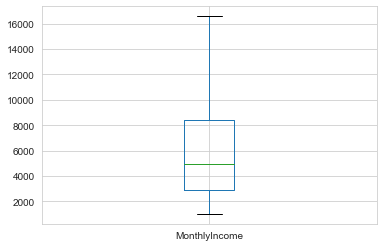

In [105]:
iqrfunction('MonthlyIncome')

Q1 is:  1.0
Q3 is : 4.0
IQR is  3.0
lower range is  -3.5
Higher rnge is  8.5


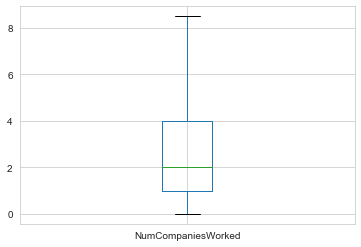

In [106]:
iqrfunction('NumCompaniesWorked')

Q1 is:  6.0
Q3 is : 15.0
IQR is  9.0
lower range is  -7.5
Higher rnge is  28.5


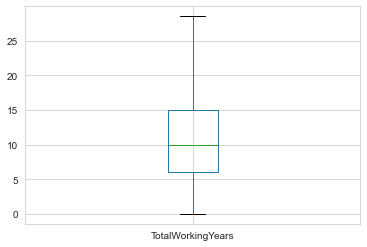

In [107]:
iqrfunction('TotalWorkingYears')

Q1 is:  2.0
Q3 is : 3.0
IQR is  1.0
lower range is  0.5
Higher rnge is  4.5


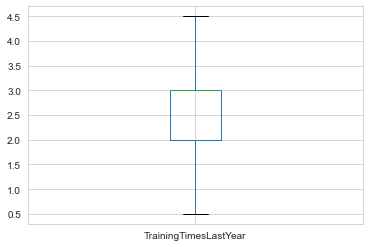

In [108]:
iqrfunction('TrainingTimesLastYear')

Q1 is:  3.0
Q3 is : 9.0
IQR is  6.0
lower range is  -6.0
Higher rnge is  18.0


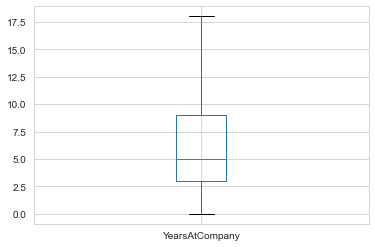

In [109]:
iqrfunction('YearsAtCompany')

Q1 is:  2.0
Q3 is : 7.0
IQR is  5.0
lower range is  -5.5
Higher rnge is  14.5


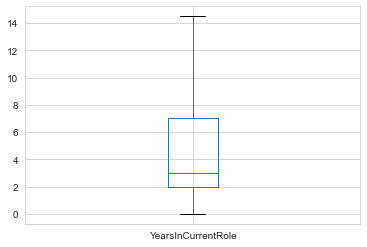

In [110]:
iqrfunction('YearsInCurrentRole')

Q1 is:  0.0
Q3 is : 3.0
IQR is  3.0
lower range is  -4.5
Higher rnge is  7.5


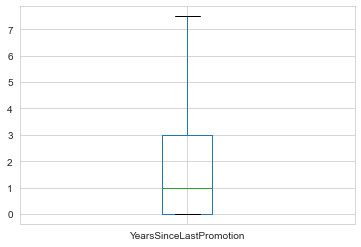

In [111]:
iqrfunction('YearsSinceLastPromotion')

Q1 is:  2.0
Q3 is : 7.0
IQR is  5.0
lower range is  -5.5
Higher rnge is  14.5


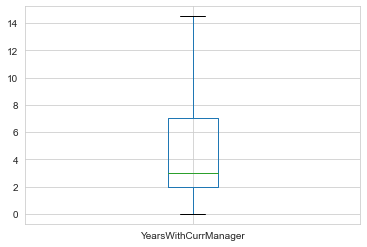

In [112]:
iqrfunction('YearsWithCurrManager')

Age                         AxesSubplot(0.125,0.125;0.025x0.755)
DailyRate                   AxesSubplot(0.155,0.125;0.025x0.755)
DistanceFromHome            AxesSubplot(0.185,0.125;0.025x0.755)
Education                   AxesSubplot(0.215,0.125;0.025x0.755)
EmployeeCount               AxesSubplot(0.245,0.125;0.025x0.755)
EmployeeNumber              AxesSubplot(0.275,0.125;0.025x0.755)
EnvironmentSatisfaction     AxesSubplot(0.305,0.125;0.025x0.755)
HourlyRate                  AxesSubplot(0.335,0.125;0.025x0.755)
JobInvolvement              AxesSubplot(0.365,0.125;0.025x0.755)
JobLevel                    AxesSubplot(0.395,0.125;0.025x0.755)
JobSatisfaction             AxesSubplot(0.425,0.125;0.025x0.755)
MonthlyIncome               AxesSubplot(0.455,0.125;0.025x0.755)
MonthlyRate                 AxesSubplot(0.485,0.125;0.025x0.755)
NumCompaniesWorked          AxesSubplot(0.515,0.125;0.025x0.755)
PercentSalaryHike           AxesSubplot(0.545,0.125;0.025x0.755)
PerformanceRating        

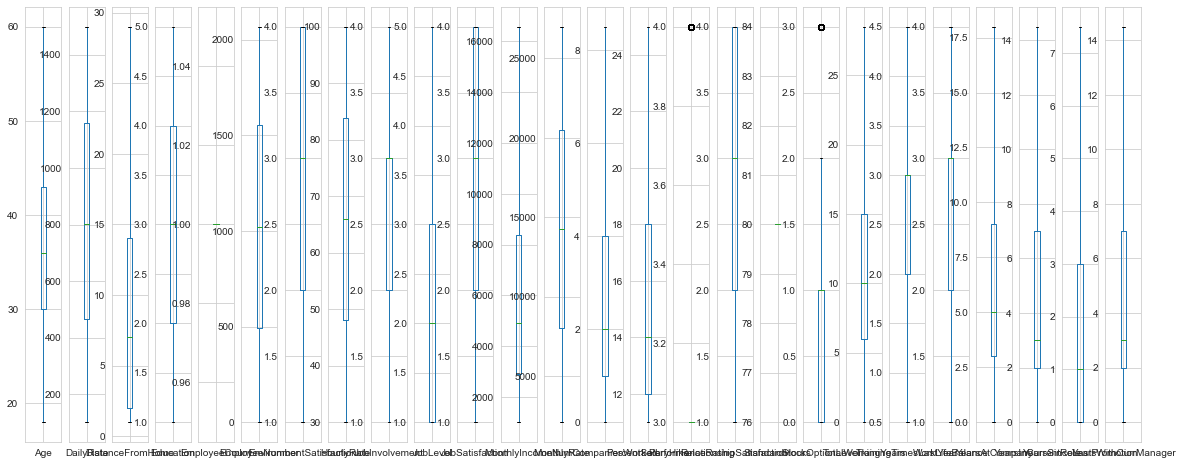

In [113]:
#Now the outliers in all the teaues are fixed, lets check once
#data.plot(kind='line',figsize=(10,5))
data.plot(kind='box',subplots=True,figsize=(20,8))

now the outliers in are fixed in all the numerical feature, There are outliers in features PerformanceRating & stocklevel options as shown below, since those are categorical variable we will encode them or change the Dtye of those features.

Q1 is:  0.0
Q3 is : 1.0
IQR is  1.0
lower range is  -1.5
Higher rnge is  2.5


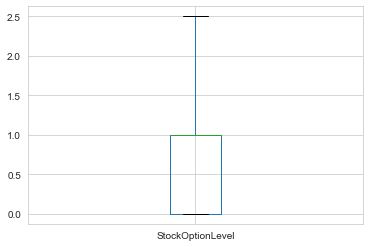

In [114]:
iqrfunction('StockOptionLevel')

Q1 is:  3.0
Q3 is : 3.0
IQR is  0.0
lower range is  3.0
Higher rnge is  3.0


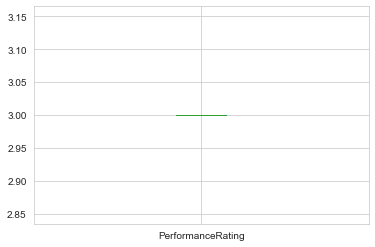

In [115]:
iqrfunction('PerformanceRating')

Age                         AxesSubplot(0.125,0.125;0.025x0.755)
DailyRate                   AxesSubplot(0.155,0.125;0.025x0.755)
DistanceFromHome            AxesSubplot(0.185,0.125;0.025x0.755)
Education                   AxesSubplot(0.215,0.125;0.025x0.755)
EmployeeCount               AxesSubplot(0.245,0.125;0.025x0.755)
EmployeeNumber              AxesSubplot(0.275,0.125;0.025x0.755)
EnvironmentSatisfaction     AxesSubplot(0.305,0.125;0.025x0.755)
HourlyRate                  AxesSubplot(0.335,0.125;0.025x0.755)
JobInvolvement              AxesSubplot(0.365,0.125;0.025x0.755)
JobLevel                    AxesSubplot(0.395,0.125;0.025x0.755)
JobSatisfaction             AxesSubplot(0.425,0.125;0.025x0.755)
MonthlyIncome               AxesSubplot(0.455,0.125;0.025x0.755)
MonthlyRate                 AxesSubplot(0.485,0.125;0.025x0.755)
NumCompaniesWorked          AxesSubplot(0.515,0.125;0.025x0.755)
PercentSalaryHike           AxesSubplot(0.545,0.125;0.025x0.755)
PerformanceRating        

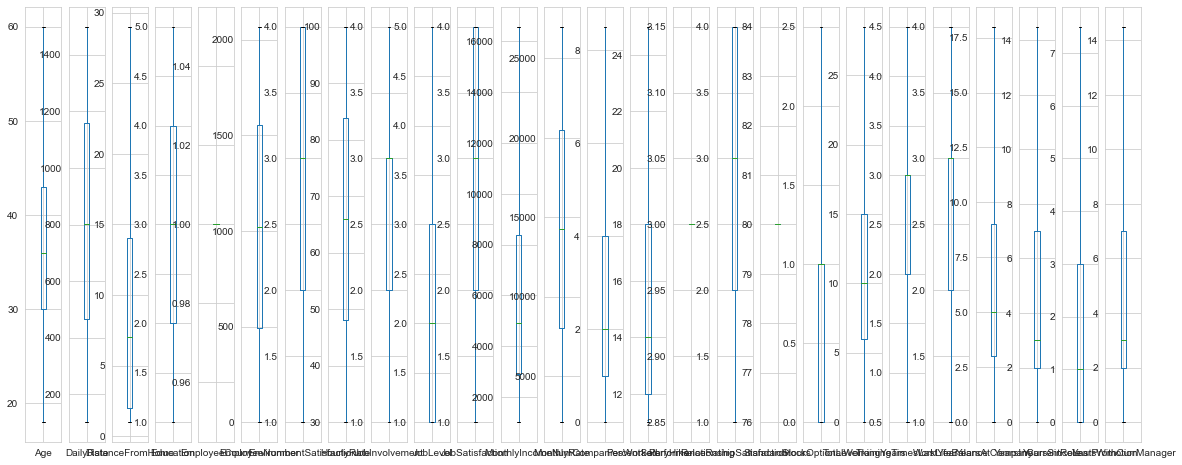

In [116]:
data.plot(kind='box',subplots=True,figsize=(20,8))

# Skewness

In [117]:
data.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,0.413286,-0.404145
DailyRate,-0.003519,-1.203823
DistanceFromHome,0.958118,-0.224833
Education,-0.289681,-0.559115
EmployeeCount,0.000000,0.000000
EmployeeNumber,0.016574,-1.223179
EnvironmentSatisfaction,-0.321654,-1.202521
HourlyRate,-0.032311,-1.196398
JobInvolvement,-0.498419,0.270999
JobLevel,1.025401,0.399152


Below 13 features are skewed as shown above lets perform power_transformer technique to remove the skewness in the dataset

DistanceFromHome                                            
JobLevel                         
MonthlyIncome                  
NumCompaniesWorked                  
PercentSalaryHike                   
PerformanceRating                      
StockOptionLevel                    
TotalWorkingYears                                             
YearsAtCompany                       
YearsInCurrentRole                    
YearsSinceLastPromotion                       
YearsWithCurrManager               

In [118]:
data['DistanceFromHome']=np.sqrt(data['DistanceFromHome'])
data['DistanceFromHome'].skew()

0.3981143787046576

now the skewness in feature DistanceFromHome is fixed, neww skewness is 0.3981143787046576

In [119]:
data['JobLevel']=np.log(data['JobLevel'])
data['JobLevel'].skew()

0.2197629343674635

now the skewness in feature JobLevel is fixed, neww skewness is 0.2197629343674635

In [120]:
data['MonthlyIncome']=np.log(data['MonthlyIncome'])
data['MonthlyIncome'].skew()

0.2107765788288627

now the skewness in feature MonthlyIncome is fixed, neww skewness is 0.2861922926389174

In [121]:
data['NumCompaniesWorked']=np.log1p(data['NumCompaniesWorked'])
data['NumCompaniesWorked'].skew()

0.07628613133336858

now the skewness in feature NumCompaniesWorked is fixed, neww skewness is 0.09289622460196824

In [122]:
data['PercentSalaryHike']=np.log(data['PercentSalaryHike'])
data['PercentSalaryHike'].skew()

0.49456573432366174

now the skewness in feature PercentSalaryHike is fixed, neww skewness is 0.49456573432366174

In [123]:
data['StockOptionLevel']=np.log1p(data['StockOptionLevel'])
data['StockOptionLevel'].skew()

0.15916451873355697

now the skewness in feature JobLevel is fixed, neww skewness is 0.2197629343674635

In [125]:
data['TotalWorkingYears']=np.sqrt(data['TotalWorkingYears'])
data['TotalWorkingYears'].skew()

0.033819723861714404

now the skewness in feature TotalWorkingYears is fixed, neww skewness is 0.17635832785911423

In [126]:
data['YearsAtCompany']=np.log1p(data['YearsAtCompany'])
data['YearsAtCompany'].skew()

-0.398162587553926

now the skewness in feature YearsAtCompany is fixed, neww skewness is -0.20770795300104433

In [127]:
data['YearsInCurrentRole']=np.log1p(data['YearsInCurrentRole'])
data['YearsInCurrentRole'].skew()

-0.39794317169689847

now the skewness in feature YearsInCurrentRole is fixed, neww skewness is -0.3834977403156446

In [128]:
data['YearsSinceLastPromotion']=np.log1p(data['YearsSinceLastPromotion'])
data['YearsSinceLastPromotion'].skew()

0.544636185649398

now the skewwness in feature YearsSinceLastPromotion is reduced to the minimum after trying all thetransformation  technique

In [129]:
data['YearsWithCurrManager']=np.log1p(data['YearsWithCurrManager'])
data['YearsWithCurrManager'].skew()

-0.36800715357867475

now the skewness in feature YearsWithCurrManager is fixed, neww skewness is -0.35768565836730937

# encoding the categorical features

In [130]:
from sklearn.preprocessing import LabelEncoder

In [212]:
#before performing lable encoding lets split the data set into x and y to avoid overfitting

x=data.drop('Attrition',axis=1)
y=data[:,1:2]
x.head()

TypeError: '(slice(None, None, None), slice(1, 2, None))' is an invalid key

In [206]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

In [133]:
encoder=LabelEncoder()
x=x.apply(encoder.fit_transform)
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,23,2,624,2,0,1,1,0,0,1,...,0,0,0,8,0,0,6,4,0,5
1,31,1,113,1,7,0,1,0,1,2,...,3,0,1,10,3,2,10,7,1,7
2,19,2,805,1,1,1,4,0,2,3,...,1,0,0,7,3,2,0,0,0,0
3,15,1,820,1,2,3,1,0,3,3,...,2,0,0,8,3,2,8,7,3,0
4,9,2,312,1,1,0,3,0,4,0,...,3,0,1,6,3,2,2,2,2,2


now the categorical features are encoded. lets pereform scaling tchnique to bring each feature into teh same scale

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [175]:
best_acc=0
best_random=0

for i in range(1,100):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)
    LR_pred=LR.predict(X_test)
    accuracy=accuracy_score(Y_test, LR_pred)
    if accuracy>best_acc:
        best_acc=accuracy
        best_random=i

print("Best Accuracy score is : ",best_acc,' and Random_state is : ',i)

Best Accuracy score is :  0.8809523809523809  and Random_state is :  99


Linear regression accurcy is 88% with the random state of 99 s the best accuracy, lets split the data with random_state as 99

In [176]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.20,random_state=99)

Now lest perform standard scaling technique

In [177]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)

In [178]:
x_test_scaled=scaler.transform(X_test)

# Balancing the dataset

In [179]:
Y_train.value_counts()

No     991
Yes    185
Name: Attrition, dtype: int64

In [180]:
from imblearn.over_sampling import SMOTE

In [181]:
X_train_os,Y_train_os=SMOTE(random_state=99).fit_resample(X_train, Y_train)

In [182]:
Y_train_os.value_counts()

No     991
Yes    991
Name: Attrition, dtype: int64

not the data set is balance by applying over sampling technique since the range between two target variables were too high

In [183]:
LR=LogisticRegression()
LR.fit(X_train_os,Y_train_os)
LR_pred=LR.predict(X_test)
print("Accuracy score is : ",accuracy_score(Y_test,LR_pred))
print("confusion matrix is : \n",confusion_matrix(Y_test,LR_pred))
print("Classification report is : \n",classification_report(Y_test,LR_pred))

Accuracy score is :  0.7108843537414966
confusion matrix is : 
 [[185  57]
 [ 28  24]]
Classification report is : 
               precision    recall  f1-score   support

          No       0.87      0.76      0.81       242
         Yes       0.30      0.46      0.36        52

    accuracy                           0.71       294
   macro avg       0.58      0.61      0.59       294
weighted avg       0.77      0.71      0.73       294



Accuracy of linear regression is 71%, lets try with other models to find the best model

In [156]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train_os,Y_train_os)
DT_pred=DT.predict(X_test)
print("Accuracy score is : ",accuracy_score(Y_test,DT_pred))
print("confusion matrix is : \n",confusion_matrix(Y_test,DT_pred))
print("Classification report is : \n",classification_report(Y_test,DT_pred))

Accuracy score is :  0.7040816326530612
confusion matrix is : 
 [[180  62]
 [ 25  27]]
Classification report is : 
               precision    recall  f1-score   support

          No       0.88      0.74      0.81       242
         Yes       0.30      0.52      0.38        52

    accuracy                           0.70       294
   macro avg       0.59      0.63      0.59       294
weighted avg       0.78      0.70      0.73       294



Accuracy of Decision tree classifier is 70.40%

In [160]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [161]:
ADA=AdaBoostClassifier()
ADA.fit(X_train_os,Y_train_os)
ADA_pred=DT.predict(X_test)
print("Accuracy score is : ",accuracy_score(Y_test,ADA_pred))
print("confusion matrix is : \n",confusion_matrix(Y_test,ADA_pred))
print("Classification report is : \n",classification_report(Y_test,ADA_pred))

Accuracy score is :  0.7040816326530612
confusion matrix is : 
 [[180  62]
 [ 25  27]]
Classification report is : 
               precision    recall  f1-score   support

          No       0.88      0.74      0.81       242
         Yes       0.30      0.52      0.38        52

    accuracy                           0.70       294
   macro avg       0.59      0.63      0.59       294
weighted avg       0.78      0.70      0.73       294



Accuracy of ADA boost classifier is 70.40%

In [162]:
RF=RandomForestClassifier()
RF.fit(X_train_os,Y_train_os)
RF_pred=RF.predict(X_test)
print("Accuracy score is : ",accuracy_score(Y_test,RF_pred))
print("confusion matrix is : \n",confusion_matrix(Y_test,RF_pred))
print("Classification report is : \n",classification_report(Y_test,RF_pred))

Accuracy score is :  0.8197278911564626
confusion matrix is : 
 [[223  19]
 [ 34  18]]
Classification report is : 
               precision    recall  f1-score   support

          No       0.87      0.92      0.89       242
         Yes       0.49      0.35      0.40        52

    accuracy                           0.82       294
   macro avg       0.68      0.63      0.65       294
weighted avg       0.80      0.82      0.81       294



Accuracy of Random forest classifier is 82%

In [171]:
from sklearn.svm import SVC

In [172]:
clf = SVC(random_state=0, tol=1e-5)

clf.fit(X_train_os,Y_train_os)
svc_pred=clf.predict(X_test)

print("SVC accuracy is : ",accuracy_score(Y_test,svc_pred))
print("SVC confusion matrix : \n",confusion_matrix(Y_test,svc_pred))
print("SVC classification report is: \n",classification_report(Y_test,svc_pred))

SVC accuracy is :  0.6190476190476191
SVC confusion matrix : 
 [[144  98]
 [ 14  38]]
SVC classification report is: 
               precision    recall  f1-score   support

          No       0.91      0.60      0.72       242
         Yes       0.28      0.73      0.40        52

    accuracy                           0.62       294
   macro avg       0.60      0.66      0.56       294
weighted avg       0.80      0.62      0.66       294



Accuracy of SVM model is 61.90%.                 


Lets verify the best performing model using cross validation technique

# Cross_Vaidation_score

In [174]:
from sklearn.model_selection import cross_val_score
print("Linear regression cross validation accuracy is :", cross_val_score(LR,x,y,cv=5).mean())
print("Decision tree classifier cross validation accuracy is :", cross_val_score(DT,x,y,cv=5).mean())
print("Random forest classifier cross validation accurcy is :", cross_val_score(RF,x,y,cv=5).mean())
print("ADA Boost classification validation accuracy is :", cross_val_score(ADA,x,y,cv=5).mean())
print("SVC validation accuracy is :", cross_val_score(clf,x,y,cv=5).mean())

Linear regression cross validation accuracy is : 0.8421768707482993
Decisn tree classifier cross validation accuracy is : 0.7809523809523808
Rndom forest classifier cross validation accurcy is : 0.8578231292517007
ADA Boost classification validation accuracy is : 0.845578231292517
SVC validation accuracy is : 0.8387755102040817


Best performing model is Random forest classifier with the accuracy of 82%

# HYPER PARAMETER TUNNING

In [185]:
from sklearn.model_selection import GridSearchCV

In [190]:
parameters={'criterion':['gini','entropy'],'n_estimators':[10,100],'class_weight':['balanced','balanced_subsample']}
gsc=GridSearchCV(RF,parameters)
gsc.fit(X_train_os,Y_train_os)
gsc

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 100]})

In [191]:
gsc.best_params_

{'class_weight': 'balanced', 'criterion': 'gini', 'n_estimators': 100}

In [194]:
Final_mod=RandomForestClassifier(class_weight='balanced',criterion='gini',n_estimators=100)
Final_mod.fit(X_train_os,Y_train_os)
Final_mod_pred=RF.predict(X_test)
print(accuracy_score(Y_test,Final_mod_pred))
print(confusion_matrix(Y_test,Final_mod_pred))

0.8197278911564626
[[223  19]
 [ 34  18]]


Final modal gives me the accuracy of 82%

In [213]:
import joblib

joblib.dump(Final_mod,'final_model.pkl')

['final_model.pkl']